# Creator-> SARTHAK ARORA

In [23]:
#TASK-7 -> Develop a neural network reading handwriting.

In [25]:
#Advanced level task
# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"
#Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. 
#It has a very user-friendly interface that’s ideal for beginners.

# Dataset link : https://en.wikipedia.org/wiki/MNIST_database

In [2]:
#Importing Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 40s 4us/step


# Count Plot

<Axes: ylabel='count'>

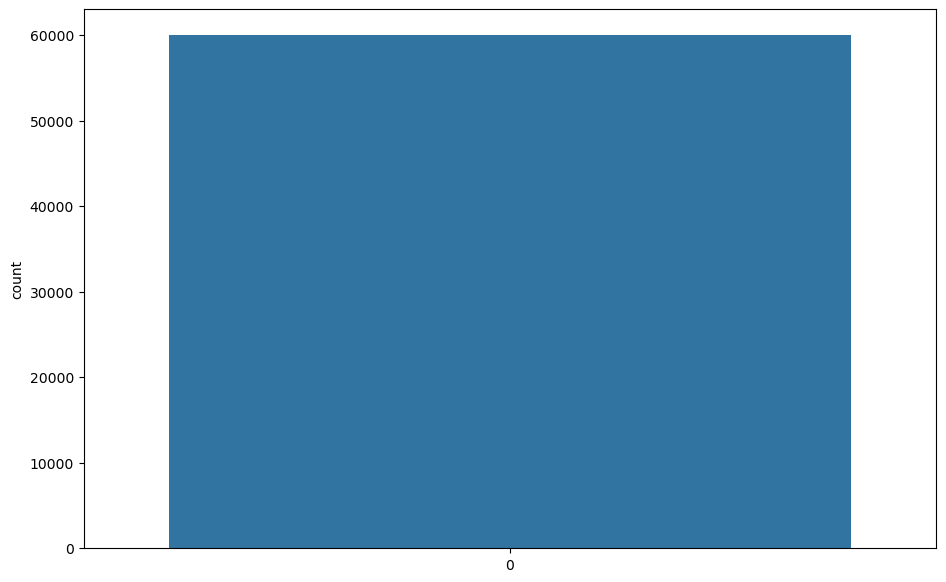

In [4]:
plt.figure(figsize = (11,7))
sb.countplot(y_train)

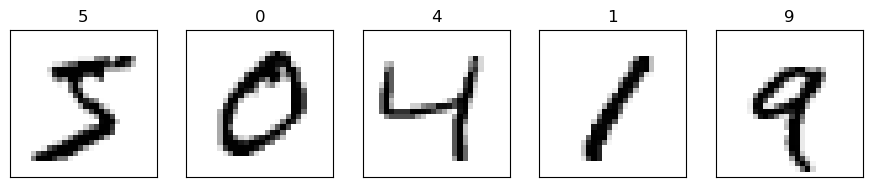

In [5]:
fig, axes = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(11, 5))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
x_train=x_train/255.0
x_test=x_test/255.0
num_classes = 10

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [10]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x=x_train, y=y_train, validation_split=0.3, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 451s 342ms/step - loss: 0.4156 - accuracy: 0.8761 - val_loss: 0.1109 - val_accuracy: 0.9704
Epoch 2/10
1313/1313 [==============================] - 408s 311ms/step - loss: 0.1640 - accuracy: 0.9523 - val_loss: 0.0954 - val_accuracy: 0.9787
Epoch 3/10
1313/1313 [==============================] - 432s 329ms/step - loss: 0.1253 - accuracy: 0.9639 - val_loss: 0.1612 - val_accuracy: 0.9731
Epoch 4/10
1313/1313 [==============================] - 431s 328ms/step - loss: 0.1110 - accuracy: 0.9682 - val_loss: 0.1256 - val_accuracy: 0.9766
Epoch 5/10
1313/1313 [==============================] - 439s 334ms/step - loss: 0.0978 - accuracy: 0.9717 - val_loss: 0.2402 - val_accuracy: 0.9682
Epoch 6/10
1313/1313 [==============================] - 430s 328ms/step - loss: 0.0836 - accuracy: 0.9753 - val_loss: 0.2942 - val_accuracy: 0.9666
Epoch 7/10
1313/1313 [==============================] - 432s 329ms/step - loss: 0.0758 - accuracy: 0.9781 - val_

In [15]:
model.save('MNproject.h5')

In [16]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

In [17]:
loss=model.evaluate(x_test,y_test)
print("Test Loss", loss[0])
print("Test Accuracy", loss[1])

313/313 [==============================] - 21s 66ms/step - loss: 0.5586 - accuracy: 0.9505
Test Loss 0.5586157441139221
Test Accuracy 0.9505000114440918


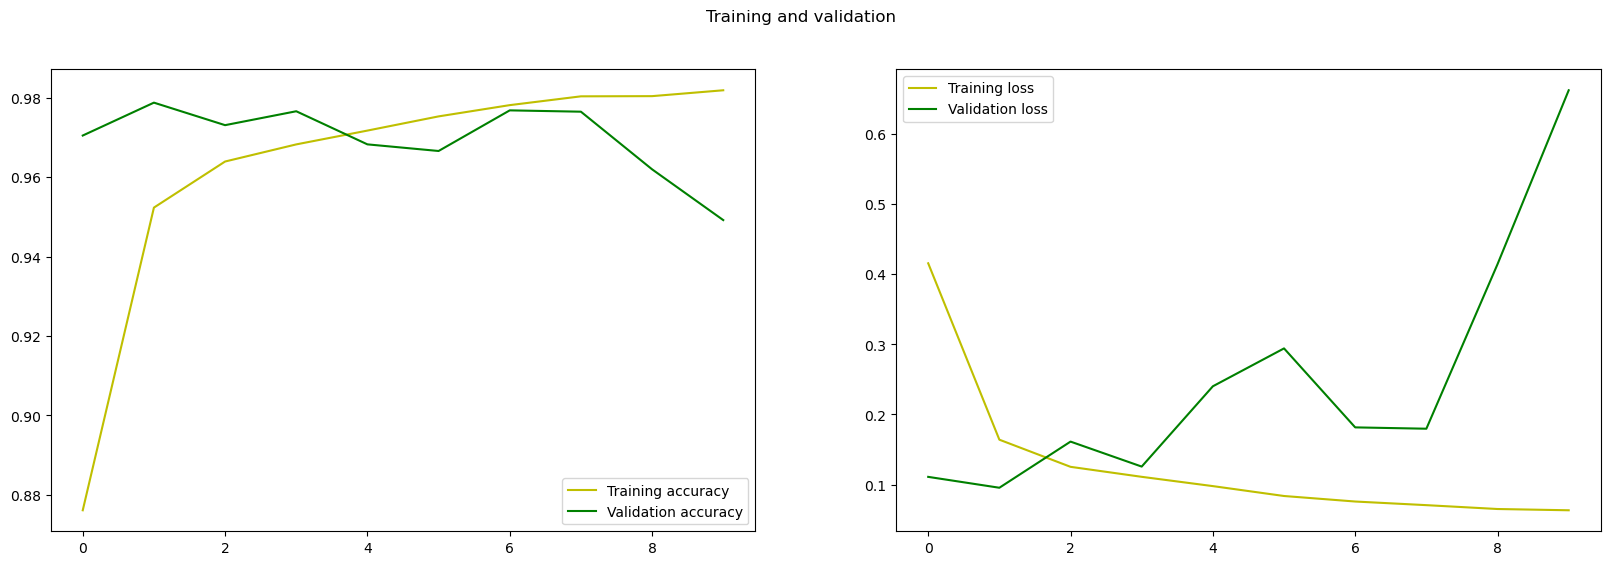

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)
plt.suptitle('Training and validation')
plt.show()

In [19]:
y_pred = model.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
c = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
c

313/313 [==============================] - 17s 54ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,   11,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   9,  156,  836,    0,    0,    0,    0,   31,    0,    0],
       [   0,    3,    0,  990,    0,    3,    0,   11,    1,    2],
       [   0,   40,    0,    0,  933,    0,    0,    1,    0,    8],
       [   2,    9,    0,    3,    0,  856,    3,    2,    0,   17],
       [   8,   22,    0,    0,    3,    1,  924,    0,    0,    0],
       [   0,   25,    2,    0,    0,    0,    0, 1000,    0,    1],
       [  16,   30,    0,    1,    2,    0,    5,    7,  877,   36],
       [   1,    8,    0,    1,    3,    1,    0,    8,    0,  987]])>

Text(108.22222222222221, 0.5, 'Saach')

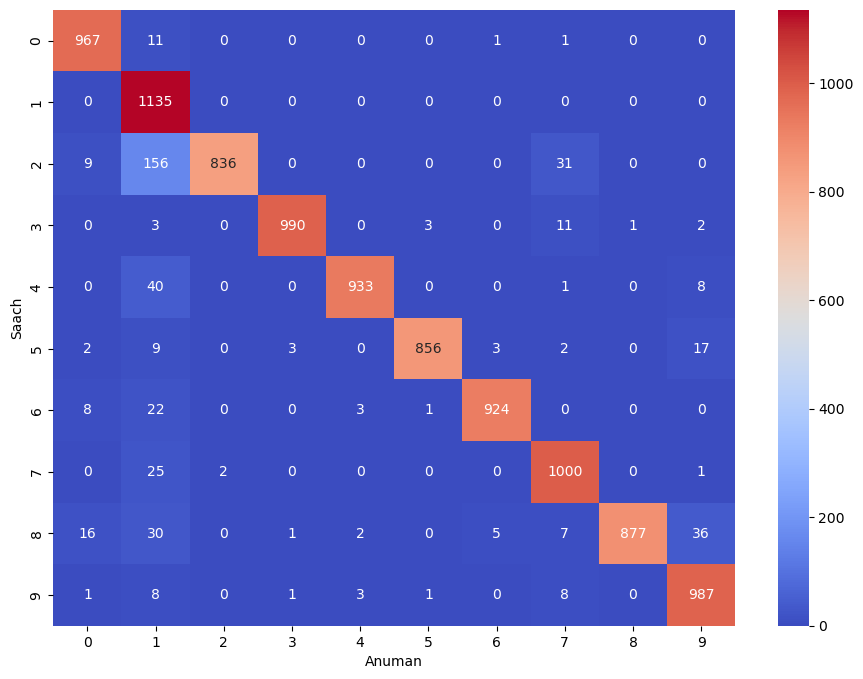

In [20]:
plt.figure(figsize = (11,8))
sb.heatmap(c, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Anuman')
plt.ylabel('Saach')

313/313 [==============================] - 17s 55ms/step
Anumanit Value:  4
Done


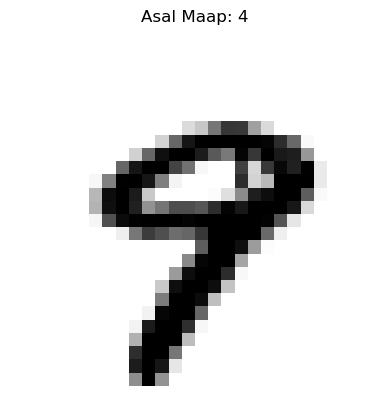

In [21]:
plt.imshow(x_test[9],cmap='gray_r')
plt.title('Asal Maap: {}'.format(y_test[6]))
prediction=model.predict(x_test)
plt.axis('off')
print('Anumanit Value: ',np.argmax(prediction[6]))
if(y_test[6]==(np.argmax(prediction[6]))):
  print('Done')
else:
  print('Fail')

313/313 [==============================] - 17s 54ms/step
Anumanit Value:  1
Done


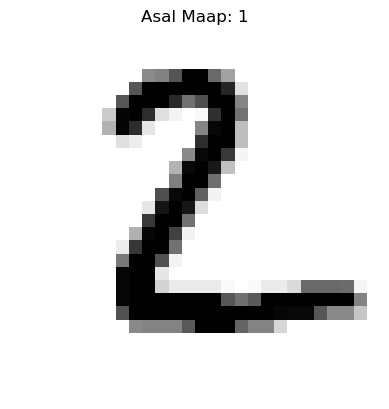

In [22]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Asal Maap: {}'.format(y_test[2]))
prediction=model.predict(x_test)
plt.axis('off')
print('Anumanit Value: ',np.argmax(prediction[2]))
if(y_test[2]==(np.argmax(prediction[2]))):
  print('Done')
else:
  print('Fail')